Importing the necessary Python libraries and the dataset:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv(r"C:\Users\dell\Documents\EDA Dataset\water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Removing all the rows that contain null values:

In [2]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

The Potability column of this dataset is the column I need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. Evaluating the distribution of 0 and 1 in the Potability column:

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


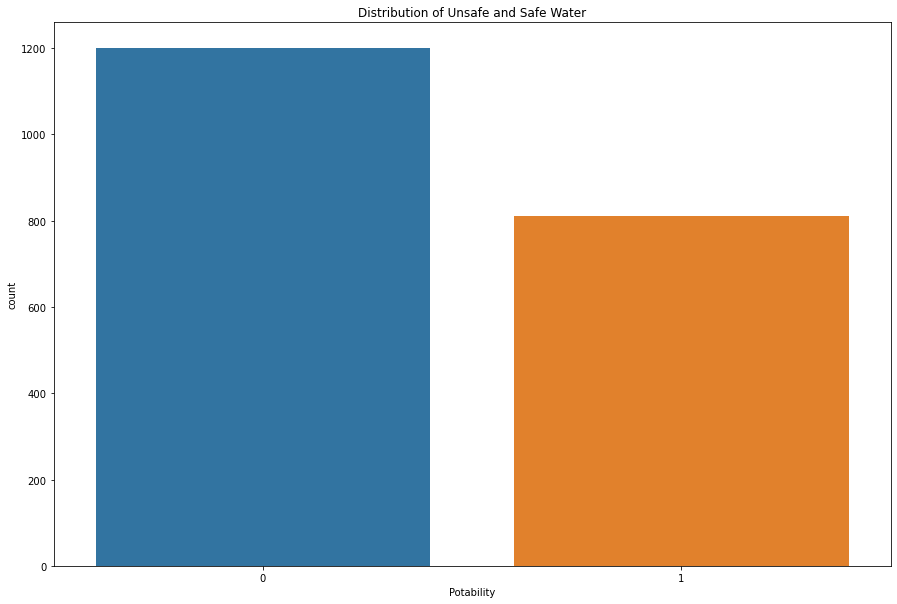

In [3]:
plt.figure(figsize=(15, 10))
sns.countplot(data.Potability)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

Dataset is not balanced because samples of 0s are more than 1s.

As mentioned above, there are no factors that I cannot ignore that affect water quality, so checking all the columns one by one. Evaluating the ph column:

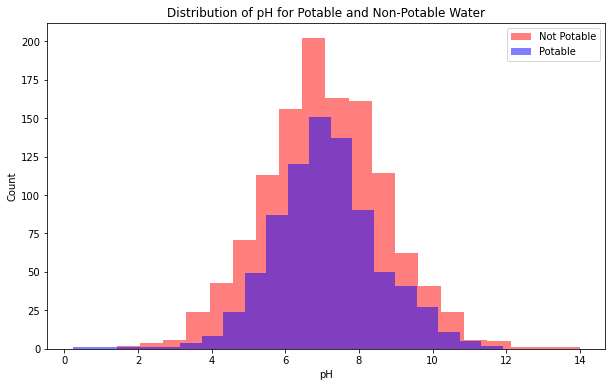

In [6]:
#import plotly.express as px
#data = data
#figure = px.histogram(data, x = "ph", color = "Potability", title= "Factors Affecting Water Quality: PH")
#figure.show()

plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['ph'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['ph'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('pH')
plt.ylabel('Count')
plt.title('Distribution of pH for Potable and Non-Potable Water')
plt.legend()
plt.show()

The ph column represents the ph value of the water which is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5. 
Now evaluating the second factor affecting water quality in the dataset:

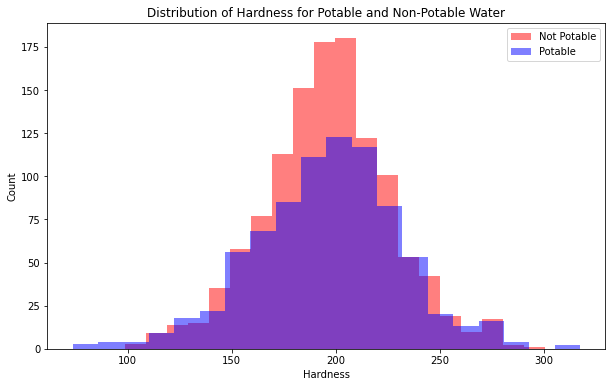

In [8]:
#figure = px.histogram(data, x = "Hardness", color = "Potability", title= "Factors Affecting Water Quality: Hardness")
#figure.show()

plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['Hardness'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['Hardness'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('Hardness')
plt.ylabel('Count')
plt.title('Distribution of Hardness for Potable and Non-Potable Water')
plt.legend()
plt.show()

The figure above shows the distribution of water hardness in the dataset. The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable. 
Evaluating the next factor affecting water quality:

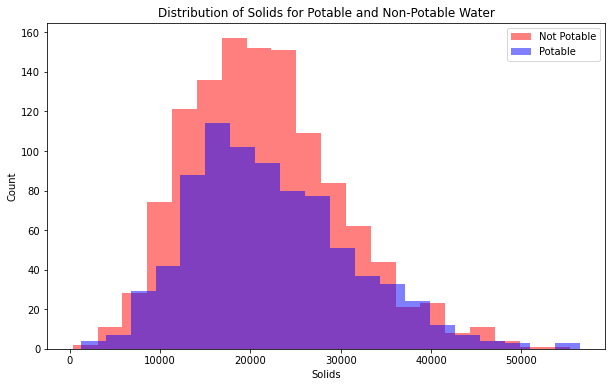

In [10]:
#figure = px.histogram(data, x = "Solids", color = "Potability", title= "Factors Affecting Water Quality: Solids")
#figure.show()

plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['Solids'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['Solids'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('Solids')
plt.ylabel('Count')
plt.title('Distribution of Solids for Potable and Non-Potable Water')
plt.legend()
plt.show()


The figure above represents the distribution of total dissolved solids in water in the dataset. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized. Now checking the next factor affecting water quality:

In [11]:
figure = px.histogram(data, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

The figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems. 

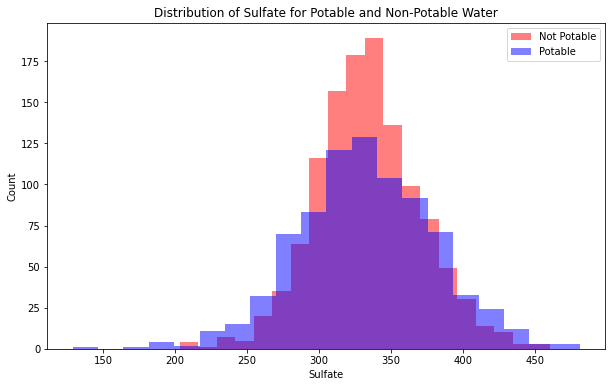

In [13]:
#figure = px.histogram(data, x = "Sulfate", color = "Potability", title= "Factors Affecting Water Quality: Sulfate")
                      
#figure.show()

# Factors Affecting Water Quality: Sulfate
plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['Sulfate'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['Sulfate'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('Sulfate')
plt.ylabel('Count')
plt.title('Distribution of Sulfate for Potable and Non-Potable Water')
plt.legend()
plt.show()


The figure above shows the distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink. 
Now evaluating the next factor:

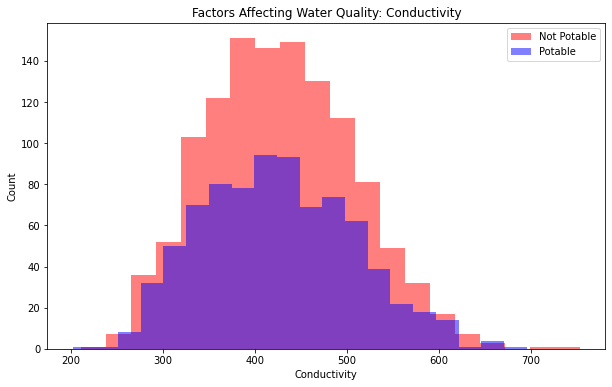

In [15]:
#figure = px.histogram(data, x = "Conductivity", color = "Potability", title= "Factors Affecting Water Quality: Conductivity")
#figure.show()

# Factors Affecting Water Quality: Conductivity
plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['Conductivity'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['Conductivity'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('Conductivity')
plt.ylabel('Count')
plt.title('Factors Affecting Water Quality: Conductivity')
plt.legend()
plt.show()


The figure above represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable. 

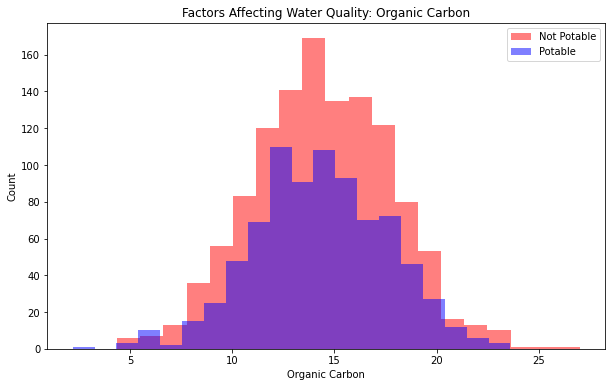

In [17]:
#figure = px.histogram(data, x = "Organic_carbon", color = "Potability", title= "Factors Affecting Water Quality: Organic Carbon")
#figure.show()

# Factors Affecting Water Quality: Organic Carbon
plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['Organic_carbon'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['Organic_carbon'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('Organic Carbon')
plt.ylabel('Count')
plt.title('Factors Affecting Water Quality: Organic Carbon')
plt.legend()
plt.show()


The figure above represents the distribution of organic carbon in water in the dataset. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink. 
Now evaluating the next factor that affects the quality of drinking water:

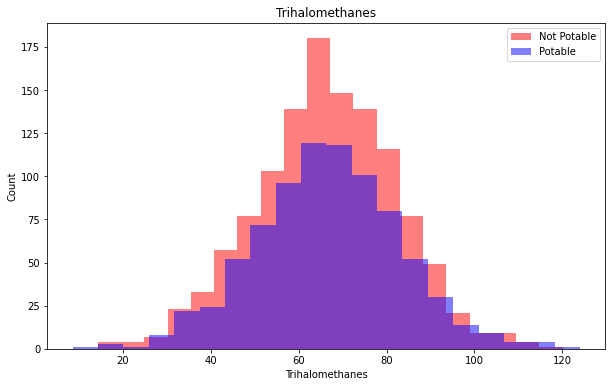

In [19]:
#figure = px.histogram(data, x = "Trihalomethanes", color = "Potability", title= "Factors Affecting Water Quality: Trihalomethanes")
#figure.show()

# Factors Affecting Water Quality: Trihalomethanes
plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['Trihalomethanes'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['Trihalomethanes'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('Trihalomethanes')
plt.ylabel('Count')
plt.title('Trihalomethanes')
plt.legend()
plt.show()


The figure above represents the distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink. 

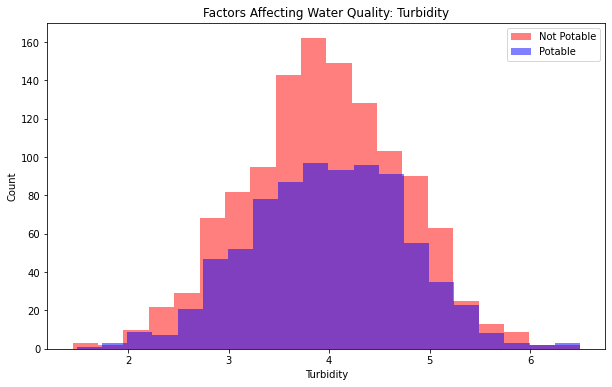

In [21]:
#figure = px.histogram(data, x = "Turbidity", color = "Potability", title= "Factors Affecting Water Quality: Turbidity")
#figure.show()

# Factors Affecting Water Quality: Turbidity
plt.figure(figsize=(10, 6))
plt.hist(data[data['Potability'] == 0]['Turbidity'], bins=20, alpha=0.5, label='Not Potable', color='red')
plt.hist(data[data['Potability'] == 1]['Turbidity'], bins=20, alpha=0.5, label='Potable', color='blue')
plt.xlabel('Turbidity')
plt.ylabel('Count')
plt.title('Factors Affecting Water Quality: Turbidity')
plt.legend()
plt.show()


The figure above represents the distribution of turbidity in water. The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.